**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ pandas 0.23.4

# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [1]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [3]:
adver_data.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [4]:
adver_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [5]:
import numpy as np
X = adver_data[['TV','Radio','Newspaper']].values
y = adver_data['Sales'].values
y.shape = (200,1)

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [6]:
means, stds = np.mean(X,axis=0), np.std(X,axis=0)
for i in range(3):
    X[:,i] = (X[:,i] - means[i])/stds[i]
#print(X)

In [7]:
#X = # Ваш код здесь

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [8]:
import numpy as np
b = np.ones(200)
b.shape = (200,1)
X = np.hstack((X,b))

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [9]:
def mserror(y, y_pred):
    er = (y-y_pred)**2
    return np.sum(er)/len(er)
    

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [10]:
yy = np.ones(200) * np.median(y, axis=0)
yy.shape = (200,1)
#np.median(y, axis=0)
print(np.median(y, axis=0))
answer1 = mserror(y, yy)
print(round(answer1, 3))

a = np.array([[1., 2.], [3., 4.]])
b = np.array([[1., 1.], [1., 1.]])
c = np.array([[10.], [20.]])
d = np.array([[10.,20.]])

print(np.dot(a,c))
#print(a.dot(c))
#print(np.linalg.inv(a))

[12.9]
28.346
[[ 50.]
 [110.]]


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [11]:
def normal_equation(X, y):
    kva = X.T
    ur = kva.dot(X).dot(kva)
    #print(kva.shape, ur.shape)
    return np.linalg.inv(kva.dot(X)).dot(kva).dot(y)

In [12]:
y.shape = (200,1)
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[[ 3.91925365]
 [ 2.79206274]
 [-0.02253861]
 [14.0225    ]]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

In [13]:
meansA = np.mean(X,axis=0)
answer2 = sum(meansA.dot(norm_eq_weights))
print(round(answer2, 3))

14.022


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [14]:
def linear_prediction(X, w):
    return X.dot(w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

In [15]:
answer3 = mserror(y, linear_prediction(X,norm_eq_weights))
#print(round(answer3, 3))
#print(norm_eq_weights)
train_ind = 2
w = norm_eq_weights
#grad0 = ((w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2] + w[3]*X[train_ind,3])-y[train_ind])
#grad1 = ((w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2] + w[3]*X[train_ind,3])-y[train_ind])
#grad2 = ((w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2] + w[3]*X[train_ind,3])-y[train_ind])
#grad3 = ((w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2] + w[3]*X[train_ind,3])-y[train_ind])

grad0 = w[0] + 2.*X[train_ind,0]*((w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2] + w[3]*X[train_ind,3])-y[train_ind])/X.shape[0]
grad1 = w[1] + 2.*X[train_ind,1]*((w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2] + w[3]*X[train_ind,3])-y[train_ind])/X.shape[0]
grad2 = w[2] + 2.*X[train_ind,2]*((w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2] + w[3]*X[train_ind,3])-y[train_ind])/X.shape[0]
grad3 = w[3] + 2.*X[train_ind,3]*((w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2] + w[3]*X[train_ind,3])-y[train_ind])/X.shape[0]
print(grad0,grad1,grad2,grad3)
#x = X[train_ind]
#x.shape = (4,1)
#wT = w.copy()
#wT.shape = (1,4)
#print('Quad',w)
#w_new = w + 2. * x*(wT.dot(x)-y[train_ind])/X.shape[0]
#print(X[0])
#print(norm_eq_weights)
print(norm_eq_weights + 2*x*(np.dot(X[train_ind])-y[train_ind])*X[train_ind])

[3.8736527] [2.83803389] [0.03110466] [14.05257671]


NameError: name 'x' is not defined

**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. 
Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [105]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
#    grady = np.empty_like(w
    
    grad0 = 2.*X[train_ind,0]*((w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2]+w[3]*X[train_ind,3])-y[train_ind])/X.shape[0]
    grad1 = 2.*X[train_ind,1]*((w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2]+w[3]*X[train_ind,3])-y[train_ind])/X.shape[0]
    grad2 = 2.*X[train_ind,2]*((w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2]+w[3]*X[train_ind,3])-y[train_ind])/X.shape[0]
    grad3 = 2.*X[train_ind,3]*((w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2]+w[3]*X[train_ind,3])-y[train_ind])/X.shape[0]
#    grad3 = 2.*X[train_ind,3]*((w[0]*X[train_ind,0]+w[1]*X[train_ind,1]+w[2]*X[train_ind,2]+w[3]*X[train_ind,3])-y[train_ind])/X.shape[0]
#    print(train_ind,eta, 'y',y[train_ind])
#    print(X[train_ind,0],w[0])
#    print(X[train_ind,1],w[1])
#    print(X[train_ind,2],w[2])
#    print(X[train_ind,3],w[3])
#    print('grad0',- eta *grad0)
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

#    x = X[train_ind]
#    x.shape = (4,1)
#    wT = w.copy()
#    wT.shape = (1,4)
#    return w - eta * 2. * x*(wT.dot(x)-y[train_ind])/X.shape[0]

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [106]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
#         random_ind = 1
        iter_num += 1
#        w_new = stochastic_gradient_step(X, y, w, random_ind, eta/iter_num)
        w_new = stochastic_gradient_step(X, y, w, random_ind, eta)
        errors.append(mserror(w, w_new))
        if verbose:
            print(iter_num, random_ind, w_new, errors[-1])
        w = w_new
        weight_dist = errors[-1]
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [107]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.array([[0.00],[0.00],[0.00],[0.00]]), eta=1e-5, max_iter=1e5,
                                min_weight_dist=1e-8, seed=42, verbose=True)

1 102 [[ 0.4602397 ]
 [-0.26310852]
 [-0.12472707]
 [ 0.296     ]] 0.0960548784288711
2 179 [[ 0.51178785]
 [-0.47616599]
 [-0.26657692]
 [ 0.53388492]] 0.031190328902975586
3 92 [[ 0.82732396]
 [-0.21183403]
 [ 0.23419891]
 [ 0.91632559]] 0.1416179314021855
4 14 [[1.06056305]
 [0.01594513]
 [0.48310527]
 [1.26640122]] 0.0726977838314065
5 106 [[ 0.84745225]
 [-0.10789321]
 [ 0.47722654]
 [ 1.41594475]] 0.020787494494971668
6 71 [[ 0.74949978]
 [-0.24422809]
 [ 0.48910862]
 [ 1.64118698]] 0.019764282809359456
7 188 [[ 1.18736747]
 [-0.41485633]
 [ 0.15552766]
 [ 1.91104428]] 0.10123533133447629
8 20 [[ 1.43834229]
 [-0.3246347 ]
 [ 0.47228892]
 [ 2.21225041]] 0.06554778347212882
9 102 [[ 1.75745548]
 [-0.50706442]
 [ 0.38580779]
 [ 2.41748586]] 0.04617860143325703
10 121 [[ 1.55355217]
 [-0.52144438]
 [ 0.51020099]
 [ 2.55365089]] 0.018949481706917345
11 74 [[ 1.76585346]
 [-0.49672727]
 [ 0.29006606]
 [ 2.82764164]] 0.042303273374159955
12 87 [[ 1.64645958]
 [-0.16738705]
 [ 0.7128598

355 60 [[ 3.81678617]
 [ 2.71303147]
 [-0.08186984]
 [14.22527165]] 0.0019359190976723658
356 47 [[ 3.84823257]
 [ 2.7487433 ]
 [-0.09796207]
 [14.2542736 ]] 0.0008410709565664941
357 146 [[ 3.79669642]
 [ 2.79986801]
 [-0.0502506 ]
 [14.2068457 ]] 0.0024488753495583515
358 3 [[ 3.79747753]
 [ 2.81814429]
 [-0.03094559]
 [14.22185264]] 0.00023313095519185341
359 34 [[ 3.77730542]
 [ 2.76846991]
 [-0.06680735]
 [14.25549973]] 0.0013231624548908955
360 191 [[ 3.75968687]
 [ 2.75072016]
 [-0.0906448 ]
 [14.27658987]] 0.00040962122494323324
361 48 [[ 3.73107287]
 [ 2.76612775]
 [-0.11786911]
 [14.24601901]] 0.000682973848817545
362 16 [[ 3.73721255]
 [ 2.7601527 ]
 [-0.14335646]
 [14.2393837 ]] 0.00019175724711447163
363 171 [[ 3.73741863]
 [ 2.75999133]
 [-0.14257253]
 [14.24039462]] 4.2625340741885834e-07
364 157 [[ 3.73728437]
 [ 2.76617495]
 [-0.14137223]
 [14.2362252 ]] 1.4270026306731767e-05
365 45 [[ 3.73458612]
 [ 2.76659982]
 [-0.14173087]
 [14.22798937]] 1.8854662138633835e-05
36

605 112 [[ 3.44363704]
 [ 3.03443099]
 [-0.1342762 ]
 [14.2113362 ]] 1.0515533635941815e-05
606 182 [[ 3.40682809]
 [ 2.99327658]
 [-0.13564032]
 [14.24603685]] 0.0010636450602626998
607 12 [[ 3.47345421]
 [ 2.95627523]
 [-0.21096818]
 [14.19973938]] 0.003406470756886013
608 22 [[ 3.52084829]
 [ 2.97135423]
 [-0.23755493]
 [14.1694142 ]] 0.001025011860570381
609 98 [[ 3.57988498]
 [ 3.01690876]
 [-0.20387319]
 [14.20485476]] 0.0019877598980036423
610 104 [[ 3.58413037]
 [ 3.01988088]
 [-0.20850965]
 [14.20884317]] 1.606527008105314e-05
611 29 [[ 3.56502936]
 [ 3.00938483]
 [-0.19841696]
 [14.23024223]] 0.0002586995434049123
612 16 [[ 3.57204841]
 [ 3.00255399]
 [-0.22755477]
 [14.22265657]] 0.0002506204801829527
613 112 [[ 3.57192456]
 [ 3.00275052]
 [-0.22707511]
 [14.22228645]] 1.0525801339892594e-07
614 61 [[ 3.61258402]
 [ 3.04274614]
 [-0.19320212]
 [14.25276191]] 0.0013322436162336263
615 83 [[ 3.6429529 ]
 [ 2.99532493]
 [-0.20088369]
 [14.21969111]] 0.0010809311064877035
616 11

**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

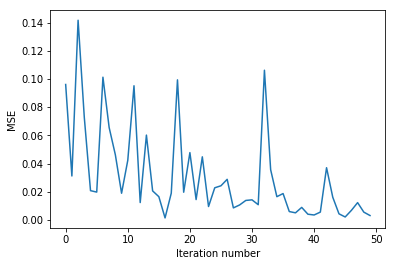

In [108]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

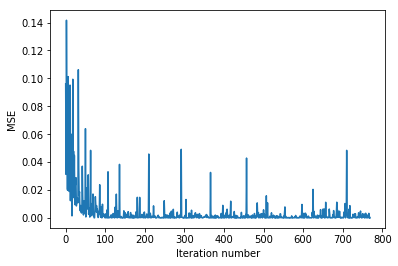

In [109]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [110]:
stoch_grad_desc_weights

array([[ 3.98092018],
       [ 2.53420182],
       [-0.03520542],
       [14.04497927]])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [111]:
stoch_errors_by_iter[-1]

2.7641890530298574e-09

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [112]:
answer4 = mserror(stoch_grad_desc_weights,norm_eq_weights)
print(round(answer4, 3))

0.018
